# HW 6

### Часть 1: EDA

### Импортируем библеотеки

In [72]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from scipy import cluster
from scipy.cluster.vq import kmeans
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import os, graphviz,pydotplus
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier


from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")


pd.set_option('max_rows', 15, 'max_columns', 500, 'max_colwidth', 1, 'precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
sns.set()
plt.rcParams['figure.figsize'] = [16, 6]

### Загружаем data frame

In [73]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [74]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
data = data.drop(["customerID"], axis = 1)

In [76]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

Series([], dtype: float64)

### Часть 2. Preprocessing & Feature Engineering

In [77]:
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)

In [78]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [79]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), data.Churn, \
                                                    test_size=0.33, random_state=42)

### Часть 3. Who's the mightiest of them all?

In [80]:
gbs = GradientBoostingClassifier, XGBClassifier, CatBoostClassifier, LGBMClassifier
all_res = []

for e in gbs:
    if e == CatBoostClassifier:
        clf = CatBoostClassifier(n_estimators=100, logging_level='Silent').fit(X_train, y_train)
        print(f'\033[1m{str(e)}\033[0m')
        print(f'Mean accuracy {clf.score(X_test, y_test)}')
        print(f'Roc score {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}')
        df = pd.DataFrame({"GB":[str(e)], "Mean accuracy":[clf.score(X_test, y_test)], "AUC-ROC":[roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])]})
        all_res.append(df)
    else:      
        clf = e(n_estimators=100).fit(X_train, y_train)
        print(f'\033[1m{str(e)}\033[0m')
        print(f'Mean accuracy {clf.score(X_test, y_test)}')
        print(f'AUC-ROC {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}')
        df = pd.DataFrame({"GB":[str(e)], "Mean accuracy":[clf.score(X_test, y_test)], "AUC-ROC":[roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])]})
        all_res.append(df)
    
data_gbs = pd.concat(all_res) 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Mean accuracy 0.8051612903225807
AUC-ROC 0.8598261638185032
<class 'xgboost.sklearn.XGBClassifier'>
Mean accuracy 0.7883870967741935
AUC-ROC 0.8399282735738227
<class 'catboost.core.CatBoostClassifier'>
Mean accuracy 0.8129032258064516
Roc score 0.8596962042420309
<class 'lightgbm.sklearn.LGBMClassifier'>
Mean accuracy 0.8034408602150538
AUC-ROC 0.8501200132117748


In [81]:
data_gbs.reset_index(drop=True)

,GB,Mean accuracy,AUC-ROC
0,<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>,0.81,0.86
1,<class 'xgboost.sklearn.XGBClassifier'>,0.79,0.84
2,<class 'catboost.core.CatBoostClassifier'>,0.81,0.86
3,<class 'lightgbm.sklearn.LGBMClassifier'>,0.80,0.85


### Изменим количество деревьев

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Best AUC-ROC 0.8598214721370421 with the best no. of trees 100


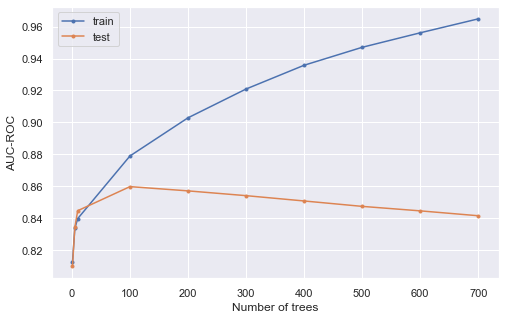

<class 'xgboost.sklearn.XGBClassifier'>
Best AUC-ROC 0.8478379793490949 with the best no. of trees 10


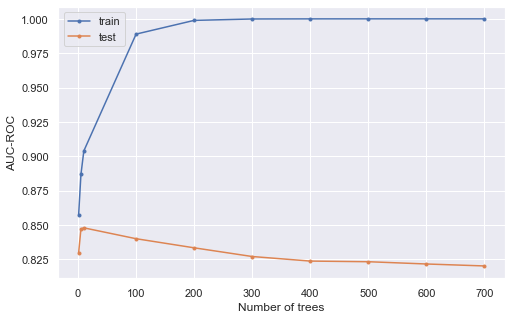

<class 'catboost.core.CatBoostClassifier'>
Best AUC-ROC 0.8596962042420309 with the best no. of trees 100


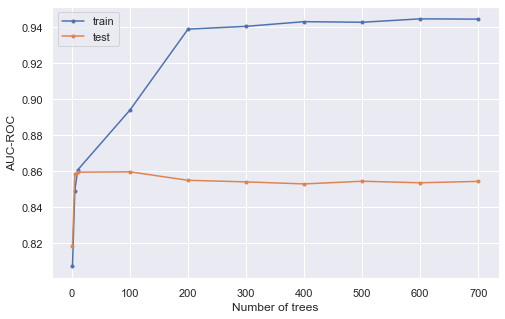

<class 'lightgbm.sklearn.LGBMClassifier'>
Best AUC-ROC 0.850971553396965 with the best no. of trees 10


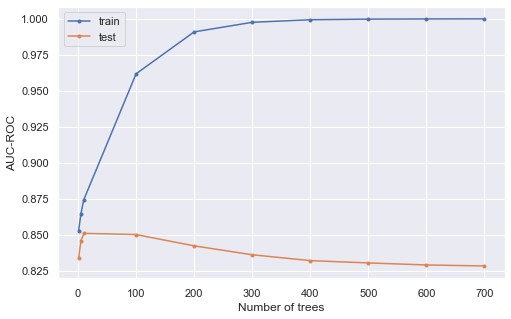

In [115]:
gbs = GradientBoostingClassifier, XGBClassifier, CatBoostClassifier, LGBMClassifier
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []

for e in gbs:
    if e == CatBoostClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for n in n_trees:
            clf = CatBoostClassifier(n_estimators=n, logging_level='Silent').fit(X_train, y_train)
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
 

        plt.figure(figsize=(8, 5))
        plt.plot(n_trees, quals_train[:10], marker='.', label='train')
        plt.plot(n_trees, quals_test[:10], marker='.', label='test')
        plt.xlabel('Number of trees')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best no. of trees {n_trees[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
    else:
        print(f'\033[1m{str(e)}\033[0m')
        for n in n_trees:
            clf = e(n_estimators=n).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)



        plt.figure(figsize=(8, 5))
        plt.plot(n_trees, quals_train, marker='.', label='train')
        plt.plot(n_trees, quals_test, marker='.', label='test')
        plt.xlabel('Number of trees')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best no. of trees {n_trees[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
        



# В данном забеге побеждает GradientBoostingClassifier с показателем AUC-ROC 0.8598214721370421 с 100 деревьями

### Зафиксируем число деревьев и изменим их глубину

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Best AUC-ROC 0.8597604802780477 with the best depth 3


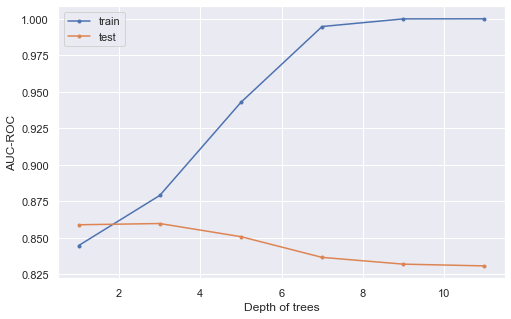

<class 'xgboost.sklearn.XGBClassifier'>
Best AUC-ROC 0.8558208753551603 with the best depth 3


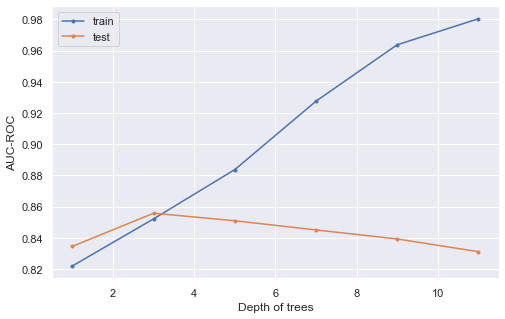

<class 'catboost.core.CatBoostClassifier'>
Best AUC-ROC 0.8627481430324777 with the best depth 3


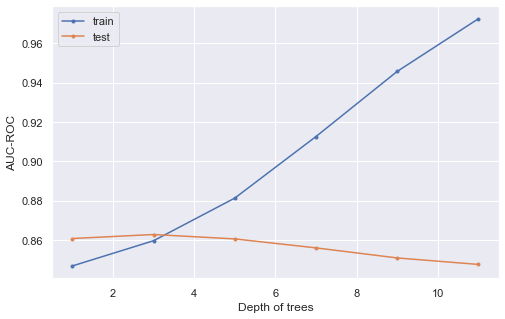

<class 'lightgbm.sklearn.LGBMClassifier'>
Best AUC-ROC 0.8525887759966069 with the best depth 7


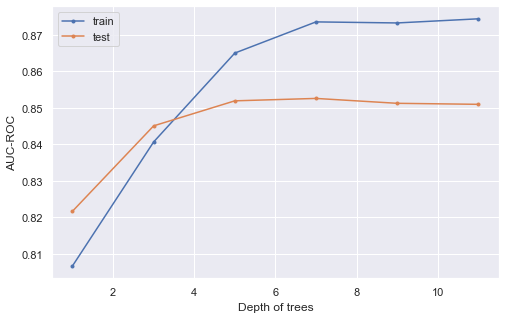

In [116]:
gbs = GradientBoostingClassifier, XGBClassifier, CatBoostClassifier, LGBMClassifier
depth = list(range(1, 12, 2))
quals_train = []
quals_test = []

for e in gbs:
    if e == CatBoostClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for d in depth:
            clf = CatBoostClassifier(n_estimators=100, max_depth=d, logging_level='Silent').fit(X_train, y_train)
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(depth, quals_train, marker='.', label='train')
        plt.plot(depth, quals_test, marker='.', label='test')
        plt.xlabel('Depth of trees')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best depth {depth[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
    elif e == GradientBoostingClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for d in depth:
            clf = e(n_estimators=100, max_depth=d ).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(depth, quals_train, marker='.', label='train')
        plt.plot(depth, quals_test, marker='.', label='test')
        plt.xlabel('Depth of trees')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best depth {depth[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
    
    else:
        print(f'\033[1m{str(e)}\033[0m')
        for d in depth:
            clf = e(n_estimators=10, max_depth=d ).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(depth, quals_train, marker='.', label='train')
        plt.plot(depth, quals_test, marker='.', label='test')
        plt.xlabel('Depth of trees')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best depth {depth[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
        



# В данном забеге побеждает CatBoostClassifier с показателем AUC-ROC 0.8627481430324777 с глубиной 3

### Изменим параметр subsample

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Best AUC-ROC 0.8607194599686971 with the best subsample 0.8


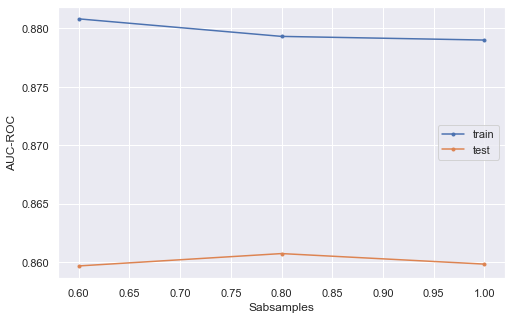

<class 'xgboost.sklearn.XGBClassifier'>
Best AUC-ROC 0.8567535816296274 with the best subsample 0.6


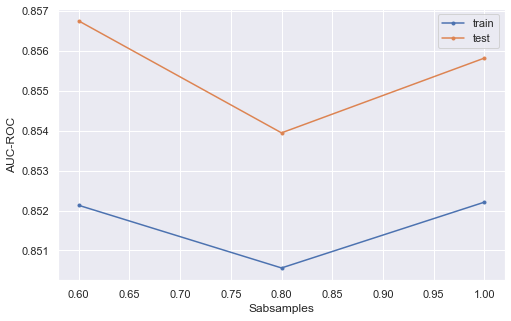

<class 'catboost.core.CatBoostClassifier'>
Best AUC-ROC 0.8632928472501116 with the best subsample 1


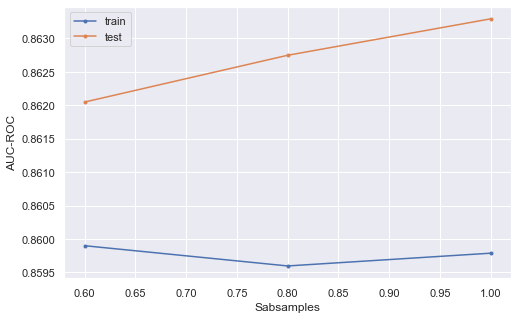

<class 'lightgbm.sklearn.LGBMClassifier'>
Best AUC-ROC 0.8519188038839616 with the best subsample 1


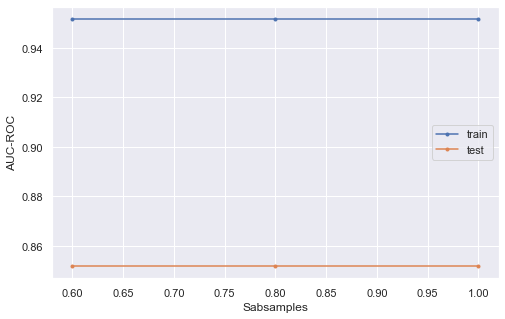

In [124]:
gbs = GradientBoostingClassifier, XGBClassifier, CatBoostClassifier, LGBMClassifier
sabsample = [1, 0.8, 0.6]
quals_train = []
quals_test = []

for e in gbs:
    if e == CatBoostClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for s in sabsample:
            clf = CatBoostClassifier(n_estimators=100, max_depth=3, subsample=s, logging_level='Silent').fit(X_train, y_train)
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(sabsample, quals_train, marker='.', label='train')
        plt.plot(sabsample, quals_test, marker='.', label='test')
        plt.xlabel('Sabsamples')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best subsample {sabsample[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
    elif e == GradientBoostingClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for s in sabsample:
            clf = e(n_estimators=100, max_depth=3, subsample=s).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(sabsample, quals_train, marker='.', label='train')
        plt.plot(sabsample, quals_test, marker='.', label='test')
        plt.xlabel('Sabsamples')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best subsample {sabsample[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
        
    elif e == LGBMClassifier:
        print(f'\033[1m{str(e)}\033[0m')
        for s in sabsample:
            clf = e(n_estimators=100, max_depth=7, subsample= s).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(sabsample, quals_train, marker='.', label='train')
        plt.plot(sabsample, quals_test, marker='.', label='test')
        plt.xlabel('Sabsamples')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best subsample {sabsample[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []
    
    else:
        print(f'\033[1m{str(e)}\033[0m')
        for s in sabsample:
            clf = e(n_estimators=10, max_depth=3, subsample=s).fit(X_train, y_train)            
            q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
            q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            quals_train.append(q_train)
            quals_test.append(q_test)
        plt.figure(figsize=(8, 5))
        plt.plot(sabsample, quals_train, marker='.', label='train')
        plt.plot(sabsample, quals_test, marker='.', label='test')
        plt.xlabel('Sabsamples')
        plt.ylabel('AUC-ROC')
        plt.legend()
        print(f'\033[1mBest AUC-ROC {max(quals_test)} with the best subsample {sabsample[np.argmax(quals_test)]}\033[0m')
        plt.show()
        quals_train = []
        quals_test = []

# В данном забеге побеждает CatBoostClassifier с показателем AUC-ROC 0.8632928472501116 со значение подвыборки 1

# Выводы


При правилньой настройке параметров можно улучшить качество модели. 

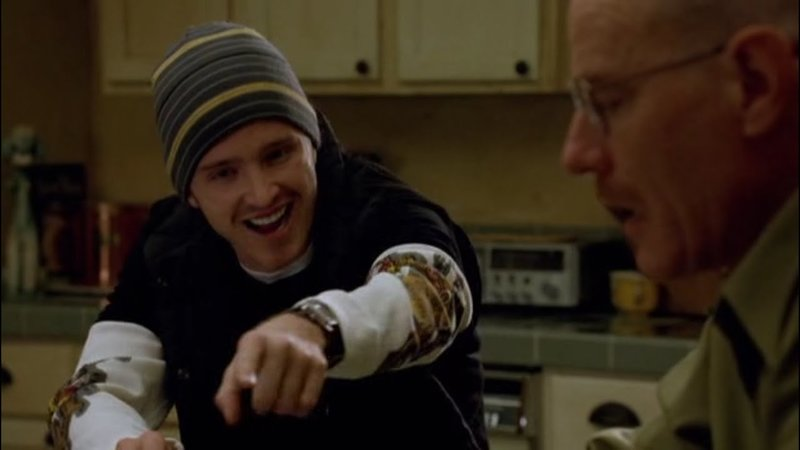